<a href="https://colab.research.google.com/github/Geebigib/Data-Science-Project/blob/main/SWaT_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install --quiet torch==1.8.1

In [3]:
# !pip install git+https://github.com/PyTorchLightning/pytorch-lightning
# import pytorch_lightning as pl
# print(pl.__version__)

## data preprocessing

In [6]:
swat_normal = pd.read_csv("SWaT_Dataset_Normal_v0.csv", skiprows=1)
swat_attack = pd.read_csv("SWaT_Dataset_Attack_v0.csv")

FileNotFoundError: ignored

In [5]:
swat_normal.columns = swat_normal.columns.str.replace(' ','')
swat_attack.columns = swat_normal.columns.str.replace(' ','')

In [6]:
swat = pd.concat([swat_normal,swat_attack],axis=0)

In [7]:
swat.tail(5)

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
449914,2/1/2016 2:59:55 PM,2.559972,519.5495,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.1535,0.865024,189.0220,0.0,1,1,1,Normal
449915,2/1/2016 2:59:56 PM,2.549082,520.4131,2,2,1,168.0979,8.638683,301.9226,2.459488,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449916,2/1/2016 2:59:57 PM,2.531467,520.6878,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449917,2/1/2016 2:59:58 PM,2.521218,520.7271,2,2,1,168.0979,8.638683,301.9226,2.460129,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal
449918,2/1/2016 2:59:59 PM,2.501681,521.1196,2,2,1,168.0979,8.638683,301.9226,2.458206,...,2,1,251.0734,0.865024,188.9259,0.0,1,1,1,Normal


In [8]:
swat.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,946719.000000,...,946719.000000,946719.000000,946719.0,946719.000000,946719.000000,946719.000000,946719.000000,946719.0,946719.000000,946719.0
mean,1.782889,596.041402,1.693162,1.721383,1.003301,238.341348,8.454710,334.957608,1.768831,1.719197,...,0.295526,1.961241,1.0,242.015200,1.102465,182.878164,0.015417,1.0,1.008478,1.0
std,1.164297,125.001581,0.470804,0.448319,0.057358,36.220978,0.124405,40.096568,1.097019,0.457877,...,0.059783,0.193020,0.0,45.864317,0.335920,35.416443,0.153964,0.0,0.091683,0.0
min,0.000000,120.623700,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0
25%,0.000000,508.990500,1.000000,1.000000,1.000000,198.218400,8.363433,318.559400,0.000000,1.000000,...,0.306569,2.000000,1.0,248.702300,0.961138,187.355800,0.000000,1.0,1.000000,1.0
50%,2.484707,527.400100,2.000000,2.000000,1.000000,258.619600,8.411177,329.248900,2.444879,2.000000,...,0.306889,2.000000,1.0,250.640900,1.089290,189.166200,0.000064,1.0,1.000000,1.0
75%,2.585594,702.899100,2.000000,2.000000,1.000000,265.540900,8.553127,333.529900,2.452696,2.000000,...,0.308426,2.000000,1.0,253.268400,1.265498,192.210300,0.000128,1.0,1.000000,1.0
max,2.760145,1000.000000,2.000000,2.000000,2.000000,272.526300,8.988273,567.469900,2.826899,2.000000,...,0.317010,2.000000,1.0,264.643700,3.668343,200.637600,1.802710,1.0,2.000000,1.0


In [9]:
swat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946719 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      946719 non-null  object 
 1   FIT101         946719 non-null  float64
 2   LIT101         946719 non-null  float64
 3   MV101          946719 non-null  int64  
 4   P101           946719 non-null  int64  
 5   P102           946719 non-null  int64  
 6   AIT201         946719 non-null  float64
 7   AIT202         946719 non-null  float64
 8   AIT203         946719 non-null  float64
 9   FIT201         946719 non-null  float64
 10  MV201          946719 non-null  int64  
 11  P201           946719 non-null  int64  
 12  P202           946719 non-null  int64  
 13  P203           946719 non-null  int64  
 14  P204           946719 non-null  int64  
 15  P205           946719 non-null  int64  
 16  P206           946719 non-null  int64  
 17  DPIT301        946719 non-nul

In [10]:
swat.shape

(946719, 53)

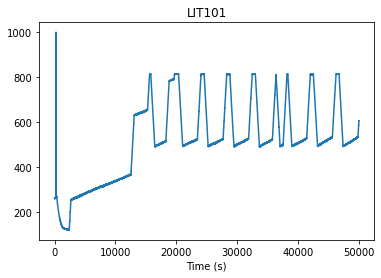

In [11]:
plt.plot(swat.index[:50000],swat["LIT101"][:50000], label='LIT101')
plt.xlabel("Time (s)")
plt.title("LIT101")
# plt.axvline(16000,c="r")
plt.show()

In [12]:
swat["Normal/Attack"].replace(' ', '', regex=True, inplace=True)

In [13]:
#import libary for preprocessing data
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from multiprocessing import cpu_count
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torchmetrics.functional import accuracy
from sklearn.metrics import classification_report, confusion_matrix


/usr/local/lib/python3.7/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [14]:
%matplotlib inline
%config InlineBackend.figure_format= 'retina'

tqdm.pandas()

In [15]:
#set random seed
pl.seed_everything(44)

Global seed set to 44


44

In [16]:
x = swat.drop(columns="Normal/Attack")
y = swat.drop(np.arange(16000))["Normal/Attack"]

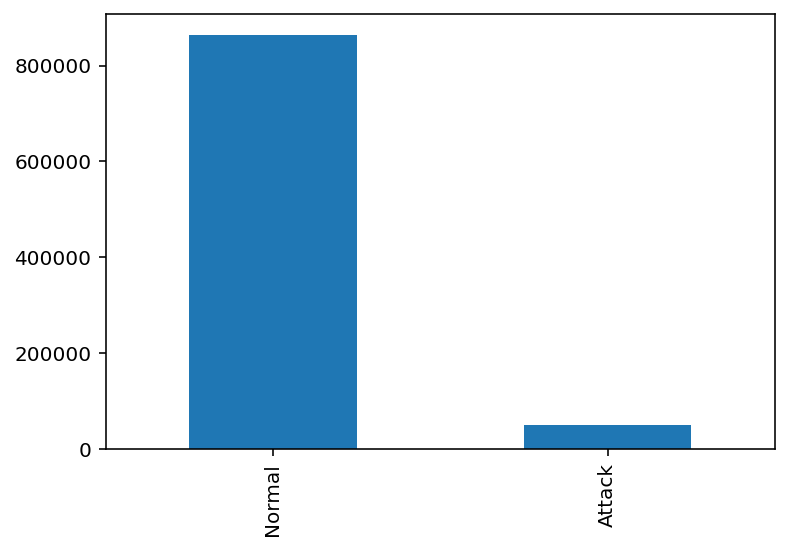

In [17]:
y.value_counts().plot(kind = "bar")

In [18]:
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(y) 
y = pd.DataFrame(
    encoded,
    index = y.index,
    columns= ["label"]
)

In [19]:
label_encoder.classes_ # normal 1, attack 0

array(['Attack', 'Normal'], dtype=object)

In [20]:
# drop unsteady state operation
x.drop(np.arange(16000),inplace=True)

In [21]:
x.drop(columns="Timestamp",inplace=True)

In [22]:
#normalise data
scaler = StandardScaler()
scaler = scaler.fit(x)

In [23]:
x_scale = pd.DataFrame(
    scaler.transform(x),
    index = x.index,
    columns= x.columns
)

In [24]:
#convert to sequence
def sequences(input_data: pd.DataFrame, target_data: pd.DataFrame, sequence_length):
    seqs = []
    data_size = len(input_data)
    
    for i in tqdm(range(data_size - sequence_length)):
        
        seq = input_data[i: i+sequence_length]
        
        label_position = i+sequence_length
        
        label = target_data.iloc[label_position]
        
        seqs.append((seq,label))
        
    return seqs

In [25]:
sequence_length = 100

x_seq = sequences(x,y,sequence_length)

  0%|          | 0/914619 [00:00<?, ?it/s]

In [26]:
len(x_seq), x.shape

(914619, (914719, 51))

In [27]:
x_seq[0]

(       FIT101    LIT101  MV101  P101  P102    AIT201    AIT202    AIT203  \
 16000     0.0  720.0919      1     2     1  262.3366  8.380415  457.3955   
 16001     0.0  719.5815      1     2     1  262.3366  8.380415  457.3955   
 16002     0.0  719.3853      1     2     1  262.3366  8.380415  457.3443   
 16003     0.0  718.4040      1     2     1  262.3366  8.380415  457.1905   
 16004     0.0  717.4227      1     2     1  262.3366  8.380415  457.1392   
 ...       ...       ...    ...   ...   ...       ...       ...       ...   
 16095     0.0  672.5175      1     2     1  262.3366  8.382017  451.8841   
 16096     0.0  671.7717      1     2     1  262.3366  8.382017  451.8841   
 16097     0.0  671.5362      1     2     1  262.3366  8.382017  451.8841   
 16098     0.0  671.5362      1     2     1  262.3366  8.382017  451.8841   
 16099     0.0  670.9474      1     2     1  262.3366  8.382017  451.8841   
 
          FIT201  MV201  ...    FIT504  P501  P502    PIT501    PIT502  \


In [28]:
#split train/test
train_seq,test_seq = train_test_split(x_seq,test_size=0.2)

In [29]:
len(train_seq), len(test_seq)

(731695, 182924)

## PyTorch Dataset

In [30]:
class SWaTDataset(Dataset):
    
    def __init__(self, sequences):
        self.sequences = sequences
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self,idx):
        sequences, label = self.sequences[idx]
        return dict(
        sequences = torch.Tensor(sequences.to_numpy()),
            label = torch.tensor(label).float()
        )

In [31]:
class SWaTDataModule(pl.LightningDataModule):
    
    def __init__(self,train_seq,test_seq,batch_size):
        super().__init__()
        self.train_seq = train_seq
        self.test_seq = test_seq
        self.batch_size = batch_size
        
    def setup(self,stage = None):
        self.train_dataset = SWaTDataset(self.train_seq)
        self.test_dataset = SWaTDataset(self.test_seq)
        
    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=cpu_count()
        )
    
    def val_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=cpu_count()
        )
    
    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=cpu_count()
        )  

## build LSTM model

In [32]:
n_epochs = 100
batch_size = 64


data_module = SWaTDataModule(train_seq,test_seq,batch_size)

In [33]:
class LSTMModel(nn.Module):
    
    def __init__(self,n_features,n_classes,n_hidden=128,n_layers=3):
        super().__init__()
        
        self.n_hidden = n_hidden
        
        self.lstm = nn.LSTM(input_size = n_features, hidden_size = n_hidden,
                            num_layers = n_layers, batch_first = True, 
                            dropout = 0.75)
        
        self.classifier = nn.Linear(n_hidden, n_classes)
        
    def forward(self,x):
        self.lstm.flatten_parameters()
        
        _,(hidden, _) = self.lstm(x)
        
        out = hidden[-1]

        out = self.classifier(out)
        
        return out

In [34]:
class SWaTPredictor(pl.LightningModule):
    
    def __init__(self, n_features:int, n_classes:int):
        super().__init__()
        self.model = LSTMModel(n_features,n_classes)
        self.criterion = nn.CrossEntropyLoss()
        
    def forward(self,x,label=None):
        output = self.model(x)
        loss = 0
        
        if label is not None:
            loss = self.criterion(output, torch.max(label, 1)[1])
        return loss, output
    
    def training_step(self, batch, batch_idx):
        sequences = batch["sequences"]
        labels = batch["label"]
        loss, outputs = self(sequences,labels)
        predictions = torch.argmax(outputs, dim=1)
        step_accuracy = accuracy(predictions,torch.tensor(labels).int())
        
        self.log("train_loss", loss, prog_bar = True, logger=True)
        self.log("train_accuracy",step_accuracy, prog_bar = True, logger = True)
        return {"loss":loss, "accuracy": step_accuracy}
    
    def test_step(self, batch, batch_idx):
        sequences = batch["sequences"]
        labels = batch["label"]
        loss, outputs = self(sequences,labels)
        predictions = torch.argmax(outputs, dim=1)
        step_accuracy = accuracy(predictions,torch.tensor(labels).int())
        
        self.log("test_loss", loss, prog_bar = True, logger=True)
        self.log("test_accuracy",step_accuracy, prog_bar = True, logger = True)
        return {"loss":loss, "accuracy": step_accuracy}
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr= 0.0001)

In [35]:
model = SWaTPredictor(
    n_features= len(x_scale.columns),
    n_classes= len(label_encoder.classes_))

In [36]:
%reload_ext tensorboard
%tensorboard --logdir ./lightning_logs

Reusing TensorBoard on port 6006 (pid 1276), started 1:49:21 ago. (Use '!kill 1276' to kill it.)

<IPython.core.display.Javascript object>

In [37]:
checkpoint_callback = ModelCheckpoint(
    dirpath = "checkpoints",
    filename = "best-checkpoint",
    save_top_k =1,
    verbose = True,
    monitor = "val_loss",
    mode = "min"
)

logger = TensorBoardLogger("lightning_logs",name = "swat")

trainer = pl.Trainer(logger= logger, 
                     callbacks = checkpoint_callback,
                     max_epochs=n_epochs, 
                     gpus=1)
                    #  progress_bar_refresh_rate=30)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:440: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, data_module)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:117: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
Missing logger folder: lightning_logs/swat
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | LSTMModel        | 357 K 
1 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
357 K     Trainable params
0         Non-trainable params
357 K     Total params
1.428     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
trainer.test()

## Prediction

In [ ]:
train_model = SWaTPredictor.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path,
    n_features = len([x_scale.columns]),
    n_classes= len(label_encoder.classes_))

train_model.freeze()